Basic Induction Experiment
======================
Inducing +1 rule for scalar encoder
---------------------------------
We induce the rule of +1 on scalars by providing a series of example encodings and attempt to generate values.

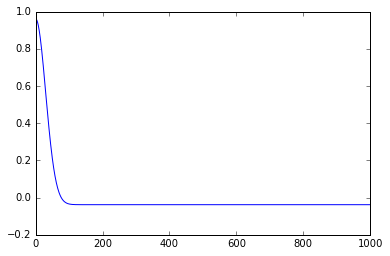

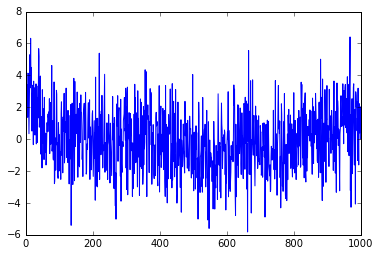

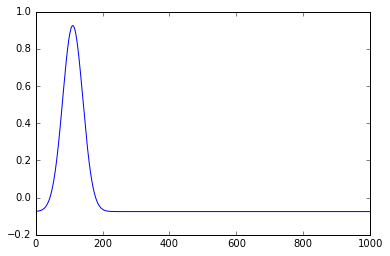

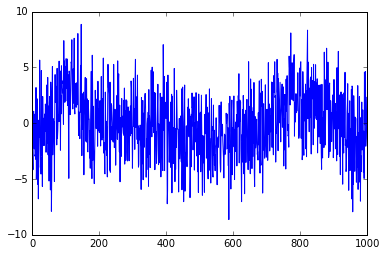

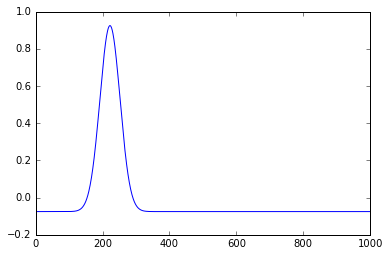

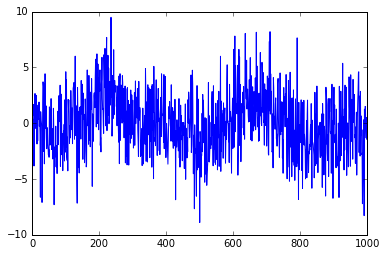

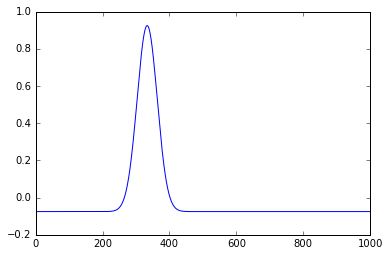

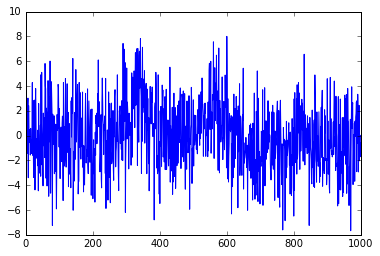

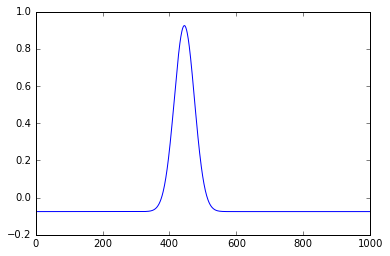

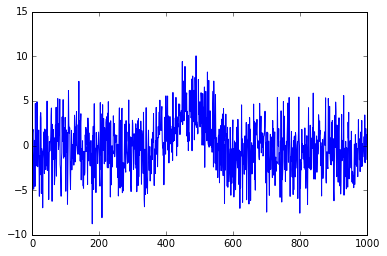

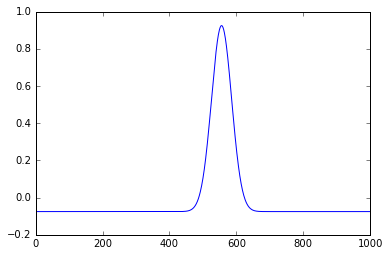

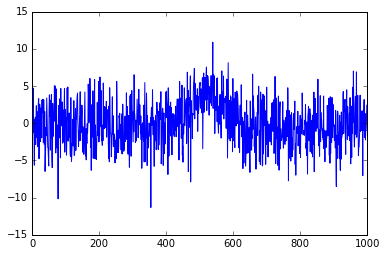

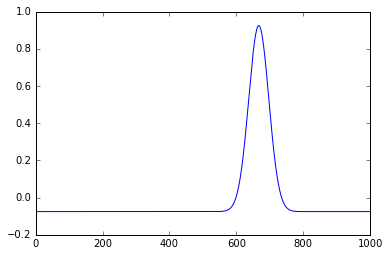

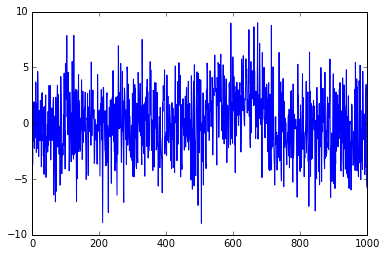

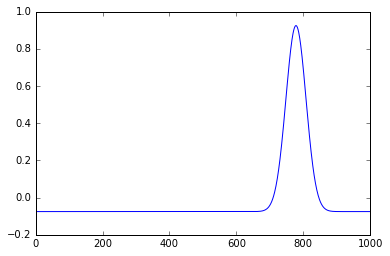

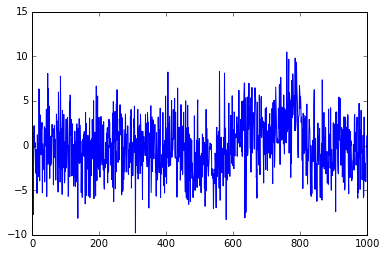

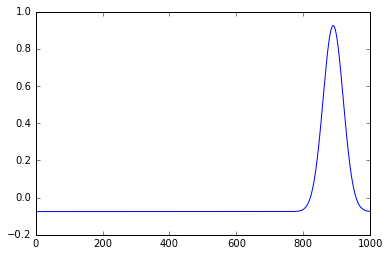

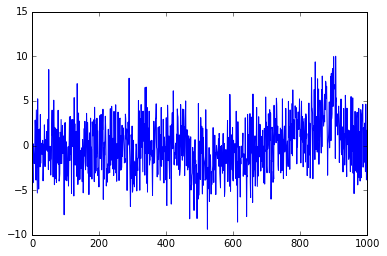

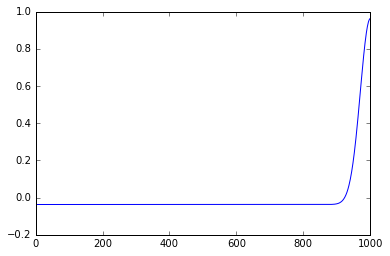

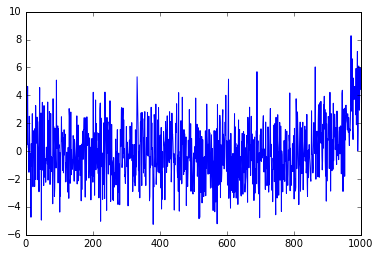

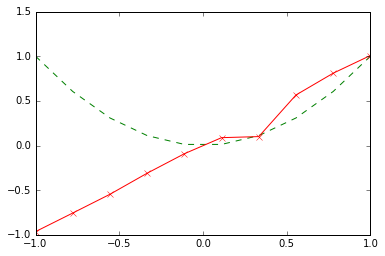

In [17]:
import numpy as np
import random
from hrr import HRR
import matplotlib.pyplot as plt
%matplotlib inline 

HRR.reset_kernel()
HRR.verbose = False


input_range = 1
probes = 10
steps = 1
size = 1000

# function to learn
def f(x):
    return x**2

HRR.input_range = [-input_range, input_range]
HRR.set_size(size)
HRR.stddev = 0.03
# generate learning dataset
examples = np.linspace(-input_range, input_range, num=200)
#print('examples: {}'.format(examples))

# create storage for averaging
exs = np.empty((examples.size, size), dtype=float)

for idx, e in enumerate(examples):
    A = float(e)
    B = f(A)
    
    exs[idx] = (HRR(B) % A).memory
    
m = HRR(0, generator=exs)

probes = np.linspace(-input_range, input_range, num=10)
xx = []
yy_real = []
yy = []
for p in probes:
    i = HRR(float(p))
    out = i * m
    #print("From:")
    HRR.plot(HRR.reverse_permute(i.memory))
    #print("To:")
    HRR.plot(HRR.reverse_permute((m * i).memory))
    
    #print('f({})={} -> real: {}'.format(p, out.decode(), f(float(p))))
    
    xx.append(float(p))
    yy_real.append(f(float(p)))
    yy.append(out.decode())

plt.figure()
plt.plot(xx,yy_real,'g--')
plt.plot(xx,yy,'rx-')
plt.show()